# Trabalho de Tópicos avançados em gestão de dados

## Integrantes:
  * Enrique Dutra
  * Lucas Pedreira

# Leitura dos dados

A leitura do dataset e sua formatação é feita aqui.

O arquivo é transformado em um pandas dataframe.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
      
frame=pd.read_csv("mushrooms.csv", delimiter=',')
frame.head(10)




,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


# Exploração inicial dos dados

In [0]:
print(frame.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


# Conversão dos dados

Como todos os dados são categóricos usarei o LabelEncoder, da biblioteca scikit, para transforma-los em dados ordinais.




In [0]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in frame.columns:
    frame[column] = labelencoder.fit_transform(frame[column])


In [0]:
frame.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Equilibrio do dataset

O dataset está equilibrado.

Podemos conferir no gráfico abaixo que existe, aproximadamente, 50% de cogumelos comestíveis e 50% de cogumelos venenosos.

Text(0.5, 1.0, 'Numero de cogumelos comestíveis e venenosos no dataset (0 = comestivel, 1 = venenoso)')

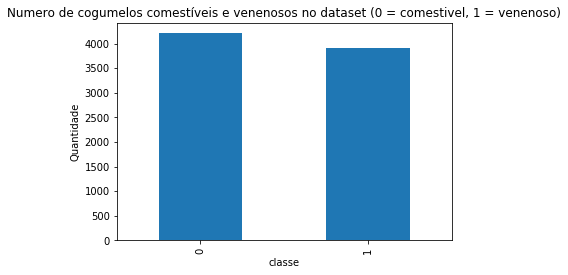

In [0]:
plt.figure()
pd.Series(frame['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Quantidade")
plt.xlabel("classe")
plt.title('Numero de cogumelos comestíveis e venenosos no dataset (0 = comestivel, 1 = venenoso)')


# Removendo colunas sem importância

Como a coluna 'veil-type' possui apenas o valor 0, ela será removida, já que não fará diferença na classificação da classe.

Utilizaremos correlação para analisar e remover(se necessário) outras colunas que possam não ser tão uteis para nós.



In [0]:
frame = frame.drop(["veil-type"],axis=1)

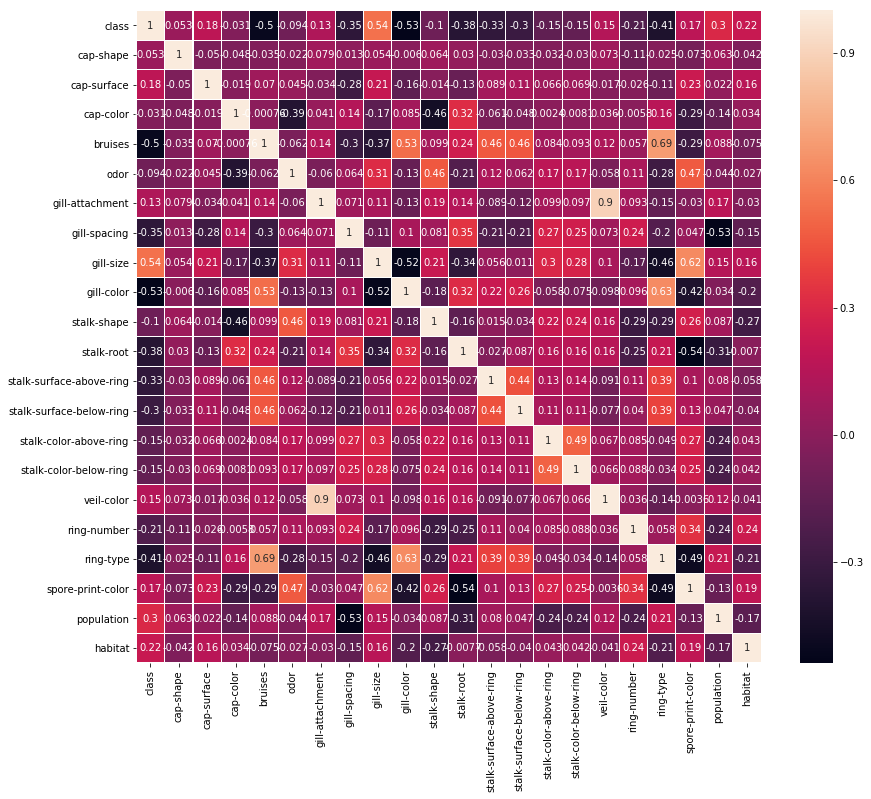

In [0]:
plt.figure(figsize=(14,12))
sns.heatmap(frame.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);


Como nenhuma coluna está altamente correlacionada com outra, não é necessário remover.


Podemos ver que gill-collor tem uma correlação de -0.53 com a class, então vamos aprender mais sobre esse coluna.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


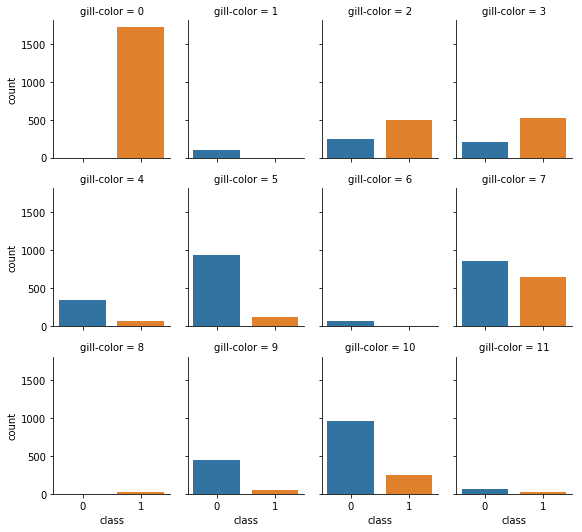

In [0]:
gill_class = frame[['class', 'gill-color']]
gill_class=gill_class[gill_class['gill-color'] < 20]
sns.factorplot('class', col='gill-color', data=gill_class, kind='count', size=2.5, aspect=.8, col_wrap=4);

Agora temos os graficos de quantas são positivas ou negativas baseadas no valor de gill-color.

# Separando o que é teste do que é treino

Para não testar e treinar com os mesmos dados, devemos separa-los.
30% do dataset vai ser teste e o resto vai ser utilizado no treinamento.


Os dados são separados em 4 dataframes. 2(treino e teste) para o X e 2(treino e teste)  para o y.


In [0]:
Y = frame["class"]
X = frame.drop(["class"], axis=1)
#X = frame[['cap-shape','cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=53)


NameError: ignored

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


# Treino e Teste
## Multilayer Perceptron

Utilizando holdout:


Configurações do MLP:
> Quantidade de camadas escondidas: (10, 5, 10)
> Tamanho do lote: 10
> A ativação é logística
> Quantidade máxima de iterações: 300

In [0]:
#MLP


mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 5, 10),batch_size=10,max_iter=300, activation='logistic')
mlp_clf.fit(X_train, Y_train.values)

y_pred = mlp_clf.predict(X_test)
print("MLP:")
print("Acurácia: ", accuracy_score(Y_test,y_pred))
print("Precisão: ", precision_score(Y_test,y_pred))
print("Recall:   ", recall_score(Y_test,y_pred))
print("F1 Score: ", f1_score(Y_test,y_pred))





MLP:
Acurácia:  1.0
Precisão:  1.0
Recall:    1.0
F1 Score:  1.0


Pontuação utilizando cross validation:



In [0]:
print(sum(cross_val_score(mlp_clf, X, Y, cv=15)/15))

0.9814417295223288


# Árvore de decisão
Utilizando Holdout:

Configurações da árvore: 
 


> Profundidade máxima = 6




In [0]:
#DecisionTree

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, Y_train.values)

y_pred = tree.predict(X_test)
print("Árvore:")
print("Acurácia:", accuracy_score(Y_test,y_pred))
print("Precisão:", precision_score(Y_test,y_pred))
print("Recall:  ", recall_score(Y_test,y_pred))
print("F1 Score: ", f1_score(Y_test,y_pred))

Árvore:
Acurácia: 0.9983593109105825
Precisão: 1.0
Recall:   0.9964881474978051
F1 Score:  0.9982409850483729


Utilizando Cross-Validation:

In [0]:
print(sum(cross_val_score(tree, X, Y, cv=15)/15))

0.9806724370386032


# Árvore de Decisão


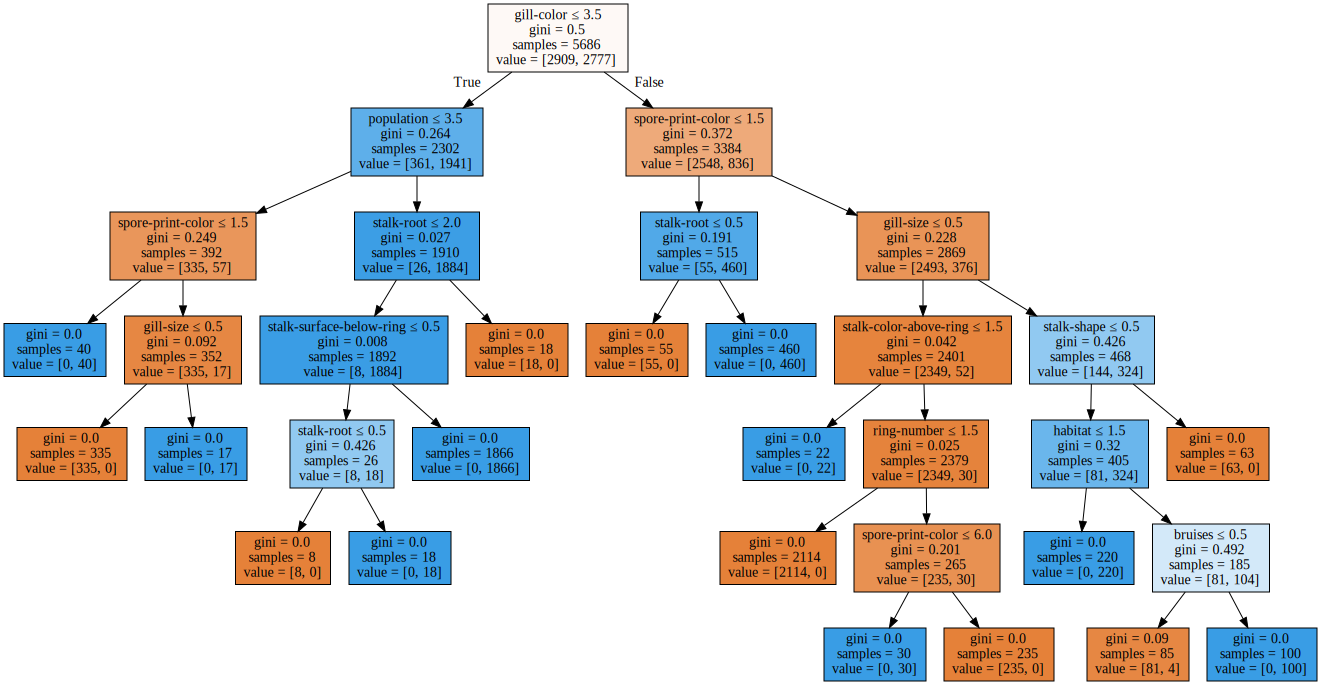

In [0]:
import graphviz
dot_data = export_graphviz(tree, 
                         feature_names=X.columns,  
                         filled=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

#Conclusão 

Com o desenvolvimento do trabalho podemos perceber na prática como é preparar um conjunto de dados para classificação e também testar diferentes tipo de classificadores para encontrar um método que nos trouxesse uma maior assertividade na hora de classificar o dataset escolhido. 
No inicio utilizamos a técnica de holdout com multilayer perceptron para nosso treinamento, e para nossa surpresa foi obtido uma assertividade muito próxima a 100%. Por um instante achamos que tivéssemos feito algum passo errado na preparação dos dados, então foi verificado novamente e aplicada segunda técnica de treinamento (Cross Validation) e encontramos um resultado similar, porem desta vez nossa taxa de acerto reduziu em 0.02%. 
A partir disto podemos concluir que para o dataset escolhido a técnica de holdout combinada com multilayer perceptron é a mais adequada para o problema escolhido.


In [0]:
#Conclusão 

Com o desenvolvimento do trabalho podemos perceber na prática como é preparar um conjunto de dados para classificação e também testar diferentes tipo de classificadores para encontrar um método que nos trouxesse uma maior assertividade na hora de classificar o dataset escolhido. 
No inicio utilizamos a técnica de holdout com multilayer perceptron para nosso treinamento, e para nossa surpresa foi obtido uma assertividade de 100% nas previsões. Por um instante achamos que tivéssemos feito algum passo errado na preparação dos dados, então foi verificado novamente e aplicada segunda técnica de treinamento (Cross Validation) e encontramos um resultado similar, porem desta vez nossa taxa de acerto reduziu em 0.02%. 
A partir disto podemos concluir que para o dataset escolhido a técnica de holdout combinada com multilayer perceptron é a mais adequada.
